In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
import numpy as np
import seaborn as sns

# Train Set

In [2]:
train=pd.read_csv("nfts_train.csv")

In [3]:
train['openrarity_score'].fillna(value=train['openrarity_score'].max(), inplace=True)
train['openrarity_rank'].fillna(value=train['openrarity_rank'].max(), inplace=True)
train['openrarity_max_rank'].fillna(value=train['openrarity_max_rank'].max(), inplace=True)

## last_sale_date

In [4]:
train.drop(columns=["last_sale_date"],inplace=True)

In [5]:
train.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_price
0,21928,0,49,2.000000,3.663833,15555.0,15555.0,1.266732
1,32621,0,45,97.077216,3.663833,15555.0,15555.0,1.200357
2,32622,1,45,139.453086,3.663833,15555.0,15555.0,3.180572
3,32623,2,45,127.753445,3.663833,15555.0,15555.0,3.502910
4,32624,3,45,112.315719,3.663833,15555.0,15555.0,4.009567


<AxesSubplot:ylabel='Frequency'>

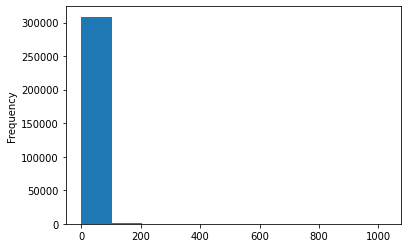

In [6]:
train["last_sale_price"].plot.hist()

# Detecting Outliers

train = train.drop(train[(train['collection_id'] == 45) & (train['last_sale_price'] >=5)].index)
train = train.drop(train[(train['collection_id'] == 0) & (train['last_sale_price'] >=0.8)].index)
train = train.drop(train[(train['collection_id'] == 1) & (train['last_sale_price'] >=0.25)].index)
train = train.drop(train[(train['collection_id'] == 4) & (train['last_sale_price'] >=0.01)].index)
train = train.drop(train[(train['collection_id'] == 6) & (train['last_sale_price'] >=11)].index)
train = train.drop(train[(train['collection_id'] == 7) & (train['last_sale_price'] >=180)].index)
train = train.drop(train[(train['collection_id'] == 8) & (train['last_sale_price'] >=0.055)].index)
train = train.drop(train[(train['collection_id'] == 13) & (train['last_sale_price'] >=0.5)].index)
train = train.drop(train[(train['collection_id'] == 14) & (train['last_sale_price'] >=1.1)].index)
train = train.drop(train[(train['collection_id'] == 15) & (train['last_sale_price'] >=0.01)].index)
train = train.drop(train[(train['collection_id'] == 18) & (train['last_sale_price'] >=0.015)].index)
train = train.drop(train[(train['collection_id'] == 19) & (train['last_sale_price'] >=0.01)].index)
train = train.drop(train[(train['collection_id'] == 23) & (train['last_sale_price'] >=5)].index)
train = train.drop(train[(train['collection_id'] == 24) & (train['last_sale_price'] >=0.01)].index)
train = train.drop(train[(train['collection_id'] == 26) & (train['last_sale_price'] >=0.01)].index)
train = train.drop(train[(train['collection_id'] == 30) & (train['last_sale_price'] >=0.8)].index)
train = train.drop(train[(train['collection_id'] == 31) & (train['last_sale_price'] >=0.02)].index)
train = train.drop(train[(train['collection_id'] == 34) & (train['last_sale_price'] >=5)].index)
train = train.drop(train[(train['collection_id'] == 36) & (train['last_sale_price'] >=0.01)].index)
train = train.drop(train[(train['collection_id'] == 38) & (train['last_sale_price'] >=0.25)].index)
train = train.drop(train[(train['collection_id'] == 37) & (train['last_sale_price'] >=0.25)].index)
train = train.drop(train[(train['collection_id'] == 43) & (train['last_sale_price'] >=1)].index)
train = train.drop(train[(train['collection_id'] == 44) & ((train['last_sale_price'] >=40)|(train['last_sale_price']<5))].index)
train = train.drop(train[(train['collection_id'] == 46) & (train['last_sale_price'] >=0.01)].index)
train = train.drop(train[(train['collection_id'] == 60) & (train['last_sale_price'] >=1)].index)
train = train.drop(train[(train['collection_id'] == 57) & (train['last_sale_price'] >=0.1)].index)
train = train.drop(train[(train['collection_id'] == 58) & (train['last_sale_price'] >=1)].index)
train = train.drop(train[(train['collection_id'] == 59) & (train['last_sale_price'] >=8)].index)
train = train.drop(train[(train['collection_id'] == 54) & (train['last_sale_price'] >=0.1)].index)
train = train.drop(train[(train['collection_id'] == 51) & ((train['last_sale_price'] >=1)|(train['last_sale_price']<0.2))].index)
train = train.drop(train[(train['collection_id'] == 50) & ((train['last_sale_price']>=1)|(train['last_sale_price']<0.01))].index)

<AxesSubplot:>

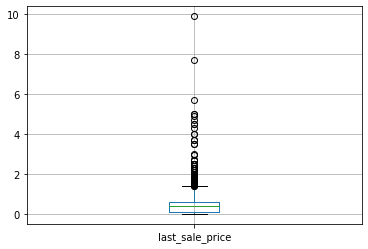

In [7]:
train[train['collection_id']==30].boxplot(column='last_sale_price')

grouped = train.groupby("collection_id")

variances = grouped["last_sale_price"].quantile(0.3)

for collection_id, group in grouped:
    variance = variances[collection_id]
    group["price"] = variance 
variances[49]=0
variances

for collection_id, variance in variances.items():
    train.loc[train["collection_id"] == collection_id, "last_sale_price"] = variance
train.head()

In [8]:
#train = train.drop(train[(train['last_sale_price']>0.5) | (train['last_sale_price']<0.001)].index)

In [9]:
coll='last_sale_price'
Q1 = train[coll].quantile(0.25)
Q3 = train[coll].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
LL0=list(train[(train[coll]>upper_limit)].index)
LL1=list(train[(train[coll]<lower_limit)].index)
train.loc[LL0, coll] = upper_limit
train.loc[LL1, coll] = lower_limit

In [10]:
#train.drop(index=LL0+LL1,inplace=True)

In [11]:
X_train0=train.drop(columns=["last_sale_price"])
y_train=train['last_sale_price']

<AxesSubplot:ylabel='Frequency'>

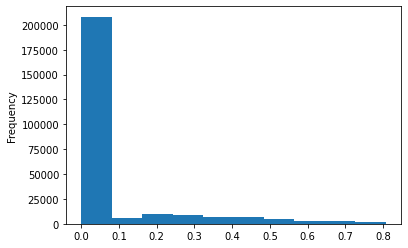

In [12]:
train["last_sale_price"].plot.hist()

In [13]:
twitter=pd.read_csv("collections_twitter_stats.csv")
twitter.head()

,Unnamed: 0,collection_id,n_tweets_in_range,avg_likes,avg_replies,avg_retweets,min_likes,min_replies,min_retweets,max_likes,max_replies,max_retweets
0,0,0,2,183.000000,8.500000,41.000000,123,3,6,243,14,76
1,1,1,16,36.375000,3.562500,13.937500,0,0,0,125,21,34
2,2,2,1,15.000000,9.000000,1.000000,15,9,1,15,9,1
3,3,3,526,1.178707,0.306084,2.655894,0,0,0,21,8,13
4,4,4,26,8.153846,0.884615,1.153846,0,0,0,30,6,12


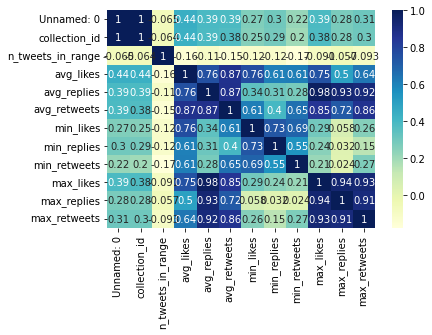

In [14]:
dataplot = sb.heatmap(twitter.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [15]:
X_train = pd.merge(X_train0, twitter, how='inner', left_on=['collection_id'], right_on=['collection_id'])
X_train.drop(columns=["Unnamed: 0"],inplace=True)

In [16]:
X_train.drop(columns=["max_likes","max_replies","max_retweets"],inplace=True)
X_train.drop(columns=["nft_id"],inplace=True)
X_train.drop(columns=["avg_retweets"],inplace=True)

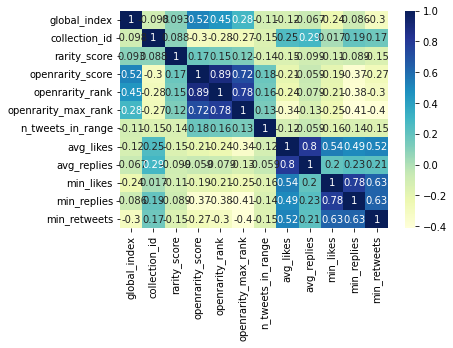

In [17]:
dataplot = sb.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [18]:
X_train.head()

,global_index,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,n_tweets_in_range,avg_likes,avg_replies,min_likes,min_replies,min_retweets
0,32632,45,116.422261,3.663833,15555.0,15555.0,11,133.181818,13.454545,0,0,7
1,32643,45,186.817878,3.663833,15555.0,15555.0,11,133.181818,13.454545,0,0,7
2,32669,45,102.919457,3.663833,15555.0,15555.0,11,133.181818,13.454545,0,0,7
3,32675,45,132.229450,3.663833,15555.0,15555.0,11,133.181818,13.454545,0,0,7
4,32688,45,209.174765,3.663833,15555.0,15555.0,11,133.181818,13.454545,0,0,7


## Collection

In [19]:
collections=pd.read_csv("collections.csv")
collections.drop(columns=["Unnamed: 0"],inplace=True)
collections.drop(columns=["creation_date"],inplace=True)
collections.head()

,collection_id,total_supply,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
0,19,1000,verified,4,own,500.0,250,False,False,True,True,True
1,45,8888,verified,5,own,500.0,250,False,False,True,True,False
2,44,10000,verified,8,own,500.0,250,True,False,True,True,False
3,53,9999,verified,9,own,900.0,250,False,False,True,True,False
4,6,9602,verified,8,own,NaN,250,False,False,True,True,False


In [20]:
X_train = pd.merge(X_train, collections, how='inner', left_on=['collection_id'], right_on=['collection_id'])

In [21]:
X_train.verification_status.replace(to_replace=['verified', 'approved'], value=[0, 1],inplace=True)
X_train.contract_type.replace(to_replace=['own', 'default'], value=[0, 1],inplace=True)
X_train["openrarity_enabled"] = X_train["openrarity_enabled"].astype(int)
X_train["has_website"] = X_train["has_website"].astype(int)
X_train["has_own_twitter"] = X_train["has_own_twitter"].astype(int)
X_train["has_medium"] = X_train["has_medium"].astype(int)
X_train["has_discord"] = X_train["has_discord"].astype(int)
X_train['seller_fees'].fillna(value=X_train['seller_fees'].mean(), inplace=True)
X_train.head()

,global_index,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,n_tweets_in_range,avg_likes,avg_replies,min_likes,...,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
0,32632,45,116.422261,3.663833,15555.0,15555.0,11,133.181818,13.454545,0,...,0,5,0,500.0,250,0,0,1,1,0
1,32643,45,186.817878,3.663833,15555.0,15555.0,11,133.181818,13.454545,0,...,0,5,0,500.0,250,0,0,1,1,0
2,32669,45,102.919457,3.663833,15555.0,15555.0,11,133.181818,13.454545,0,...,0,5,0,500.0,250,0,0,1,1,0
3,32675,45,132.229450,3.663833,15555.0,15555.0,11,133.181818,13.454545,0,...,0,5,0,500.0,250,0,0,1,1,0
4,32688,45,209.174765,3.663833,15555.0,15555.0,11,133.181818,13.454545,0,...,0,5,0,500.0,250,0,0,1,1,0


# Test Set

In [22]:
test=pd.read_csv("nfts_predict.csv")
test.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,last_sale_date
0,0,0,29,176.364208,NaN,NaN,NaN,2022-06
1,1,1,29,207.209228,NaN,NaN,NaN,2022-05
2,2,2,29,157.293414,NaN,NaN,NaN,2022-10
3,3,3,29,173.372185,NaN,NaN,NaN,2022-06
4,4,4,29,190.077584,NaN,NaN,NaN,2022-06


In [23]:
test.drop(columns=["last_sale_date"],inplace=True)

In [24]:
test['openrarity_score'].fillna(value=test['openrarity_score'].mean(), inplace=True)
test['openrarity_rank'].fillna(value=test['openrarity_rank'].mean(), inplace=True)
test['openrarity_max_rank'].fillna(value=test['openrarity_max_rank'].mean(), inplace=True)
test.head()

,global_index,nft_id,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank
0,0,0,29,176.364208,1.0,4372.867628,8741.760731
1,1,1,29,207.209228,1.0,4372.867628,8741.760731
2,2,2,29,157.293414,1.0,4372.867628,8741.760731
3,3,3,29,173.372185,1.0,4372.867628,8741.760731
4,4,4,29,190.077584,1.0,4372.867628,8741.760731


In [25]:
X_test = pd.merge(test, twitter, how='inner', left_on=['collection_id'], right_on=['collection_id'])
X_test.drop(columns=["Unnamed: 0"],inplace=True)

In [26]:
X_test.drop(columns=["max_likes","max_replies","max_retweets"],inplace=True)
X_test.drop(columns=["avg_retweets"],inplace=True)
X_test.drop(columns=["nft_id"],inplace=True)

In [27]:
X_test.head(10)

,global_index,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,n_tweets_in_range,avg_likes,avg_replies,min_likes,min_replies,min_retweets
0,0,29,176.364208,1.0,4372.867628,8741.760731,2,340.5,68.5,0,0,11
1,1,29,207.209228,1.0,4372.867628,8741.760731,2,340.5,68.5,0,0,11
2,2,29,157.293414,1.0,4372.867628,8741.760731,2,340.5,68.5,0,0,11
3,3,29,173.372185,1.0,4372.867628,8741.760731,2,340.5,68.5,0,0,11
4,4,29,190.077584,1.0,4372.867628,8741.760731,2,340.5,68.5,0,0,11
5,5,29,179.253721,1.0,4372.867628,8741.760731,2,340.5,68.5,0,0,11
6,6,29,178.262251,1.0,4372.867628,8741.760731,2,340.5,68.5,0,0,11
7,7,29,159.956535,1.0,4372.867628,8741.760731,2,340.5,68.5,0,0,11
8,8,29,242.094658,1.0,4372.867628,8741.760731,2,340.5,68.5,0,0,11
9,9,29,195.745328,1.0,4372.867628,8741.760731,2,340.5,68.5,0,0,11


In [28]:
X_test = pd.merge(X_test, collections, how='inner', left_on=['collection_id'], right_on=['collection_id'])
X_test.verification_status.replace(to_replace=['verified', 'approved'], value=[0, 1],inplace=True)
X_test.contract_type.replace(to_replace=['own', 'default'], value=[0, 1],inplace=True)
X_test["openrarity_enabled"] = X_test["openrarity_enabled"].astype(int)
X_test["has_website"] = X_test["has_website"].astype(int)
X_test["has_own_twitter"] = X_test["has_own_twitter"].astype(int)
X_test["has_medium"] = X_test["has_medium"].astype(int)
X_test["has_discord"] = X_test["has_discord"].astype(int)
X_test['seller_fees'].fillna(value=X_test['seller_fees'].mean(), inplace=True)
X_test.head()

,global_index,collection_id,rarity_score,openrarity_score,openrarity_rank,openrarity_max_rank,n_tweets_in_range,avg_likes,avg_replies,min_likes,...,verification_status,n_of_traits,contract_type,seller_fees,platform_fees,openrarity_enabled,has_website,has_own_twitter,has_discord,has_medium
0,0,29,176.364208,1.0,4372.867628,8741.760731,2,340.5,68.5,0,...,0,10,0,750.0,250,0,0,1,0,0
1,1,29,207.209228,1.0,4372.867628,8741.760731,2,340.5,68.5,0,...,0,10,0,750.0,250,0,0,1,0,0
2,2,29,157.293414,1.0,4372.867628,8741.760731,2,340.5,68.5,0,...,0,10,0,750.0,250,0,0,1,0,0
3,3,29,173.372185,1.0,4372.867628,8741.760731,2,340.5,68.5,0,...,0,10,0,750.0,250,0,0,1,0,0
4,4,29,190.077584,1.0,4372.867628,8741.760731,2,340.5,68.5,0,...,0,10,0,750.0,250,0,0,1,0,0


X_test.drop(columns=["openrarity_score","avg_replies","min_likes","min_replies",'min_retweets','openrarity_rank','platform_fees','openrarity_max_rank'],inplace=True)
X_train.drop(columns=["openrarity_score","avg_replies","min_likes","min_replies",'min_retweets','openrarity_rank','platform_fees','openrarity_max_rank'],inplace=True)

# Training

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train0, y_train, test_size=0.2, random_state=42)

In [30]:
X_train = X_train.sample(frac = 1)

## XGBoost

In [31]:
from sklearn.metrics import mean_squared_error as mse
def metric(y_pred, dtrain):
    y_true=dtrain.get_label()

    return "metric",np.exp(-np.sqrt(mse(y_true, y_pred)) / 10)

In [32]:
import xgboost as xgb

# Create the XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth =3, n_estimators = 500,tree_method='gpu_hist',disable_default_eval_metric=1)

# Train the model on the training data
xg_reg.fit(X_train, y_train,eval_set=[(X_train, y_train),(X_val, y_val)],eval_metric=metric,verbose=50)

C:\Users\alaba\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[17:52:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-metric:0.95947	validation_1-metric:0.95951
[50]	validation_0-metric:0.98366	validation_1-metric:0.98372
[100]	validation_0-metric:0.98367	validation_1-metric:0.98372
[150]	validation_0-metric:0.98367	validation_1-metric:0.98373
[200]	validation_0-metric:0.98368	validation_1-metric:0.98373
[250]	validation_0-metric:0.98368	validation_1-metric:0.98373
[300]	validation_0-metric:0.98369	validation_1-metric:0.98373
[350]	validation_0-metric:0.98369	validation_1-metric:0.98373
[400]	validation_0-metric:0.98369	validation_1-metric:0.98373
[450]	validation_0-metric:0.98370	validation_1-metric:0.98373
[499]	validation_0-metric:0.98370	validation_1-metric:0.98373


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, disable_default_eval_metric=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [33]:
y_pred0 = xg_reg.predict(X_train)
# Calculate the root mean squared error
rmse = sqrt(mean_squared_error(y_train, y_pred0))

# Calculate the exp(-RMSE/10) metric
exp_rmse = exp(-rmse / 10)
print("Train Score:",exp_rmse)

Train Score: 0.9836993281447288


In [34]:
# Calculate the root mean squared error
y_predBo = xg_reg.predict(X_val)
rmse = sqrt(mean_squared_error(y_val, y_predBo))

# Calculate the exp(-RMSE/10) metric
exp_rmse = exp(-rmse / 10)
print("Test Score:",exp_rmse)

Test Score: 0.9837315968171837


# Cross Validation(Overfitting)

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("RMSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[17:52:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscal

# Submission

In [36]:
result=pd.DataFrame()
y_predBo = xg_reg.predict(test)
result['global_index']=test['global_index']
result['last_sale_price']=y_predBo

In [37]:
result.set_index(['global_index'],inplace=True)
result.head()

,last_sale_price
global_index,
0,0.063058
1,0.060861
2,0.060594
3,0.063058
4,0.060862


In [39]:
result.to_csv('submission_format.csv')